In [230]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/modified_pirus_codebook.json') as f:
    pirus_codebook = json.load(f)
    
mask = pirus['loc_plot_state1_us_dummy'] == 1
pirus = pirus[mask]

In [206]:
#create dataframe
education_ideologicalfamily = pirus[['education', 'radicalization_islamist','radicalization_far_right','radicalization_far_left','radicalization_single_issue']]

#drop emptyfields
education_ideologicalfamily = education_ideologicalfamily.dropna(subset=['education'])

#convert floats to integers
education_ideologicalfamily['education'] = education_ideologicalfamily['education'].astype(int)

#sum number of incidents
education_ideologicalfamily = education_ideologicalfamily.groupby(['education']).sum()
education_ideologicalfamily = education_ideologicalfamily.reset_index()

#create codebook name functions
e_codes = pirus_codebook['education']['codes']
ed_fun = lambda x: e_codes[str(x)]

#apply function
education_ideologicalfamily['education'] = education_ideologicalfamily['education'].apply(ed_fun)

education_ideologicalfamily

,education,radicalization_islamist,radicalization_far_right,radicalization_far_left,radicalization_single_issue
0,Did not attempt high school,4,5,0,1
1,Some High school,46,43,16,7
2,High school diploma,85,86,13,13
3,Some College,91,61,26,15
4,College degree,57,38,29,29
5,Some Vocational school,3,2,2,1
6,Vocational school degree,3,3,1,5
7,Some Master’s school,4,1,3,2
8,Master’s degree,15,7,9,9
9,Some Doctoral/Professional degree,4,3,3,1


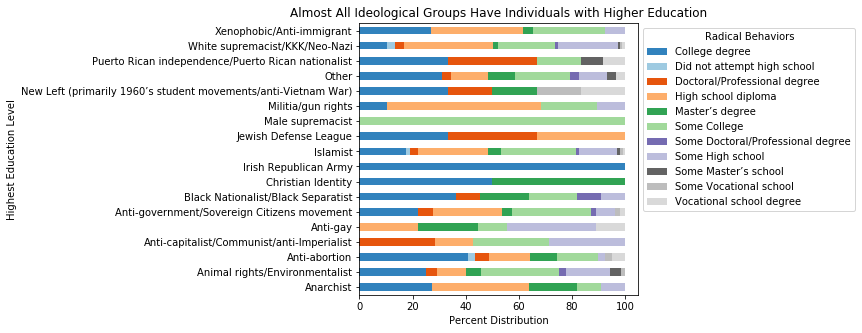

In [213]:
#create dataframe 
ideological_education = pirus[['ideological_sub_category1', 'education']]

#drop empty fields
ideological_education = ideological_education.dropna(subset=['ideological_sub_category1'])
ideological_education = ideological_education.dropna(subset=['education'])

#convert floats to integers
ideological_education['ideological_sub_category1'] = ideological_education['ideological_sub_category1'].astype(int)
ideological_education['education'] = ideological_education['education'].astype(int)

#create codebook name functions
ideo_codes = pirus_codebook['ideological_sub_category']['codes']
ideo_fun = lambda x: ideo_codes[str(x)]

e_codes = pirus_codebook['education']['codes']
ed_fun = lambda x: e_codes[str(x)]

#apply naming functions
ideological_education['ideological_sub_category1'] = ideological_education['ideological_sub_category1'].apply(ideo_fun)
ideological_education['education'] = ideological_education['education'].apply(ed_fun)

#create crosstab data
ax= pd.crosstab(ideological_education['ideological_sub_category1'], ideological_education['education']).apply(lambda r: r/r.sum()*100, axis=1)
ax1 = ax.plot.barh(figsize=(5,5),stacked=True, rot=0, colormap='tab20c')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Radical Behaviors")
plt.title('Almost All Ideological Groups Have Individuals with Higher Education')
plt.xlabel('Percent Distribution')
plt.ylabel('Highest Education Level')


plt.show()

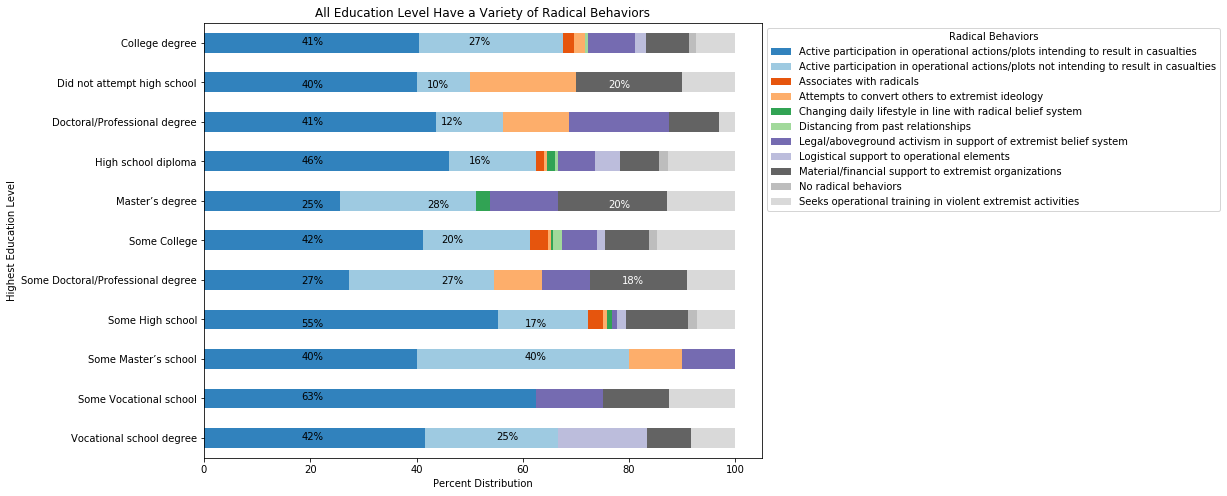

In [223]:
#create dataframe 
radbehaviors_education = pirus[['radical_behaviors', 'education']]

#drop empty fields
radbehaviors_education = radbehaviors_education.dropna(subset=['radical_behaviors'])
radbehaviors_education = radbehaviors_education.dropna(subset=['education'])

#convert floats to integers
radbehaviors_education['radical_behaviors'] = radbehaviors_education['radical_behaviors'].astype(int)
radbehaviors_education['education'] = radbehaviors_education['education'].astype(int)

#create codebook name functions
rad_codes = pirus_codebook['radical_behaviors']['codes']
rad_fun = lambda x: rad_codes[str(x)]

e_codes = pirus_codebook['education']['codes']
ed_fun = lambda x: e_codes[str(x)]

#apply naming functions
radbehaviors_education['radical_behaviors'] = radbehaviors_education['radical_behaviors'].apply(rad_fun)
radbehaviors_education['education'] = radbehaviors_education['education'].apply(ed_fun)

#create crosstab data
ax= pd.crosstab(radbehaviors_education['education'], radbehaviors_education['radical_behaviors']).apply(lambda r: r/r.sum()*100, axis=1)
ax = ax.sort_values('education', ascending=False)

ax1 = ax.plot.barh(figsize=(10,8),stacked=True, rot=0, colormap='tab20c')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Radical Behaviors")
plt.title('All Education Level Have a Variety of Radical Behaviors')
plt.xlabel('Percent Distribution')
plt.ylabel('Highest Education Level')

#Radical Behaviors 1
ax1.annotate('41%',
            xy=(.25, .9), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('40%',
            xy=(.25, .8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('41%',
            xy=(.25, .715), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('46%',
            xy=(.25, .625), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')  
ax1.annotate('25%',
            xy=(.25, .525), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('42%',
            xy=(.25, .445), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('27%',
            xy=(.25, .35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('55%',
            xy=(.25, .25), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('40%',
            xy=(.25, .175), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('63%',
            xy=(.25, .084), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('42%',
            xy=(.25, -.01), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')


#Radical behaviors 2
ax1.annotate('27%',
            xy=(.55, .9), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('10%',
            xy=(.475, .8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('12%',
            xy=(.5, .715), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('16%',
            xy=(.55, .625), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom') 
ax1.annotate('28%',
            xy=(.475, .525), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom') 

ax1.annotate('20%',
            xy=(.5, .445), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('27%',
            xy=(.5, .35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('17%',
            xy=(.65, .25), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('40%',
            xy=(.65, .175), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('25%',
            xy=(.6, -.01), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
#Financing
ax1.annotate('20%',
            xy=(.8, .8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color='white')
ax1.annotate('20%',
            xy=(.8, .525), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color='white')
ax1.annotate('18%',
            xy=(.825, .35), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom', color='white')
plt.show()

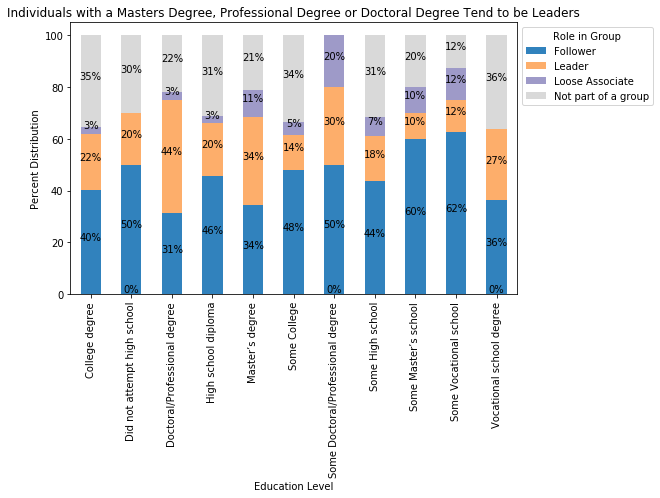

In [259]:
#create dataframe 
grouprole_education = pirus[['role_group', 'education']]

#drop empty fields
grouprole_education = grouprole_education.dropna(subset=['role_group'])
grouprole_education = grouprole_education.dropna(subset=['education'])

#convert floats to integers
grouprole_education['role_group'] = grouprole_education['role_group'].astype(int)
grouprole_education['education'] = grouprole_education['education'].astype(int)

#create codebook name functions
r_codes = pirus_codebook['role_group']['codes']
r_fun = lambda x: r_codes[str(x)]

e_codes = pirus_codebook['education']['codes']
ed_fun = lambda x: e_codes[str(x)]

#apply naming functions
grouprole_education['role_group'] = grouprole_education['role_group'].apply(r_fun)
grouprole_education['education'] = grouprole_education['education'].apply(ed_fun)

#create crosstab data
ax= pd.crosstab(grouprole_education['education'], grouprole_education['role_group']).apply(lambda r: r/r.sum()*100, axis=1)

ax1 = ax.plot.bar(figsize=(8,5),stacked=True, rot=90, colormap='tab20c')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Role in Group")
plt.xlabel('Education Level')
plt.ylabel('Percent Distribution')
plt.title('Individuals with a Masters Degree, Professional Degree or Doctoral Degree Tend to be Leaders')
for rec in ax1.patches:
    height = rec.get_height()
    ax1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              horizontalalignment='center', 
              va='bottom')

plt.show()

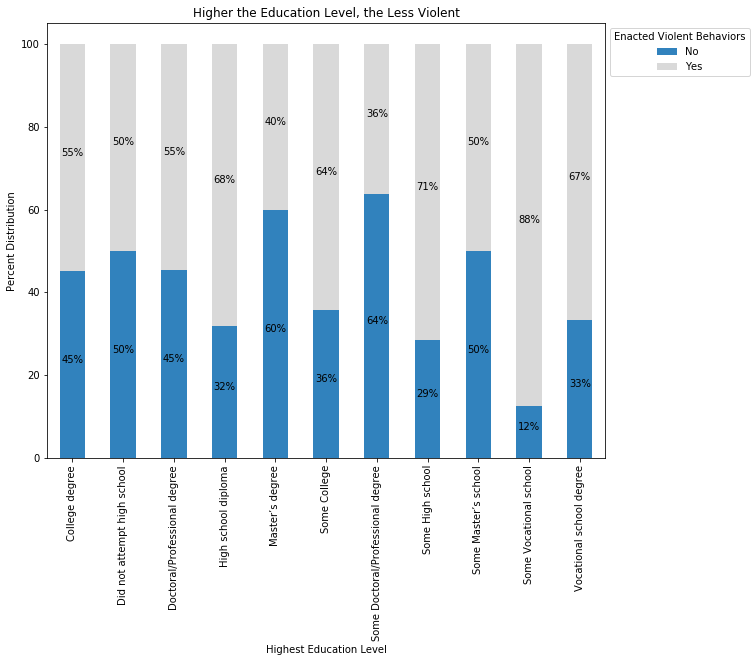

In [258]:
#create dataframe 
violence_education = pirus[['violent', 'education']]

#drop empty fields
violence_education = violence_education.dropna(subset=['violent'])
violence_education = violence_education.dropna(subset=['education'])

#convert floats to integers
violence_education['violent'] = violence_education['violent'].astype(int)
violence_education['education'] = violence_education['education'].astype(int)

#create codebook functions
e_codes = pirus_codebook['education']['codes']
ed_fun = lambda x: e_codes[str(x)]
v_codes = pirus_codebook['violent']['codes']
v_fun = lambda x: v_codes[str(x)]

#apply function
violence_education['education'] = violence_education['education'].apply(ed_fun)
violence_education['violent'] = violence_education['violent'].apply(v_fun)

#create crosstab data
ax= pd.crosstab(violence_education['education'], violence_education['violent']).apply(lambda r: r/r.sum()*100, axis=1)

ax1 = ax.plot.bar(figsize=(10,8),stacked=True, rot=90, colormap='tab20c')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Enacted Violent Behaviors")
plt.xlabel('Highest Education Level')
plt.ylabel('Percent Distribution')
plt.title('Higher the Education Level, the Less Violent')
for rec in ax1.patches:
    height = rec.get_height()
    ax1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              horizontalalignment='center', 
              va='bottom')

plt.show()